In [6]:
import numpy as np
import matplotlib.pyplot as plt
import constants as c

In [34]:
# Load data different surrogate functions

spks_layers = np.load('Diff_Surrogates/Spks_layers.npy')
pots_layers = np.squeeze(np.load('Diff_Surrogates/Potential.npy'))
spks_tot_overall = np.load('Diff_Surrogates/Spks_tot_overall.npy')
accs = np.squeeze(np.load('Diff_Surrogates/Accs.npy'))

spks_layers = np.transpose(spks_layers, (0,1,3,2))
pots_layers = np.sum(np.transpose(pots_layers, (0,1,3,2)), axis=2)

print(f"[surrogates, slopes, layer, epochs] - {np.shape(spks_layers)}")
print(f"[surrogates, slopes, layer, epochs] - {np.shape(pots_layers)}")
print(f"[surrogates, slopes] - {np.shape(spks_tot_overall)}")
print(f"[surrogates, slopes, train-test, epochs] - {np.shape(accs)}")

[surrogates, slopes, layer, epochs] - (2, 3, 3, 350)
[surrogates, slopes, layer, epochs] - (2, 3, 350)
[surrogates, slopes] - (2, 3)
[surrogates, slopes, train-test, epochs] - (2, 3, 2, 350)


(array([ 2.,  4.,  2.,  4., 10.,  5., 19.,  9., 11., 16., 13., 11.,  6.,
        10.,  7.,  6., 11.,  9.,  7., 11., 11.,  4.,  4.,  2.,  7.,  6.,
         3.,  6.,  6.,  6.,  4.,  4.,  3.,  3.,  3.,  3.,  0.,  2.,  1.,
         3.,  4.,  4.,  1.,  0.,  3.,  0.,  3.,  2.,  2.,  0.,  4.,  3.,
         1.,  0.,  2.,  6.,  1.,  2.,  1.,  4.,  3.,  2.,  2.,  3.,  5.,
         1.,  1.,  3.,  1.,  2.,  2.,  2.,  3.,  2.,  3.,  1.,  3.,  1.,
         2., 11.]),
 array([-93.0634079 , -91.92714691, -90.79088593, -89.65462494,
        -88.51835632, -87.38209534, -86.24583435, -85.10957336,
        -83.97331238, -82.83705139, -81.70078278, -80.56452179,
        -79.4282608 , -78.29199982, -77.15573883, -76.01947784,
        -74.88320923, -73.74694824, -72.61068726, -71.47442627,
        -70.33816528, -69.2019043 , -68.06563568, -66.92937469,
        -65.79311371, -64.65685272, -63.52059174, -62.38432693,
        -61.24806595, -60.11180496, -58.97554016, -57.83927917,
        -56.70301819, -55.5667

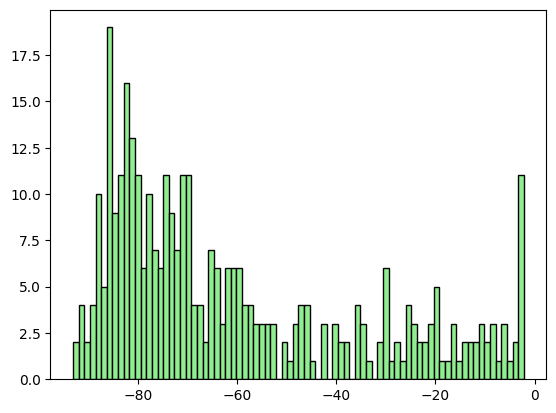

In [48]:
# Plot Histogram of Membrane Distribution summed over the 3 layers

plt.hist(x=pots_layers[0][1], color='lightgreen', ec='black', bins=80)

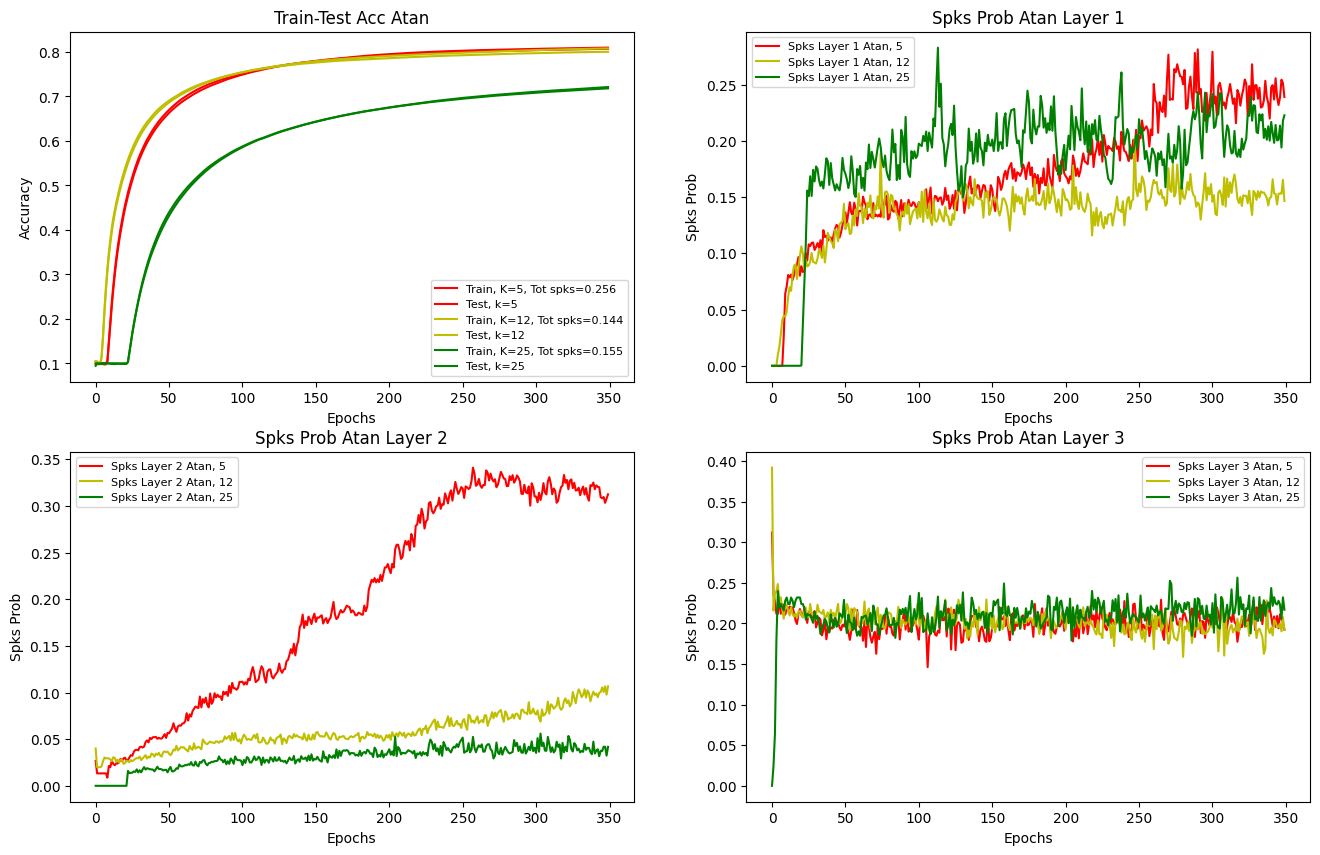

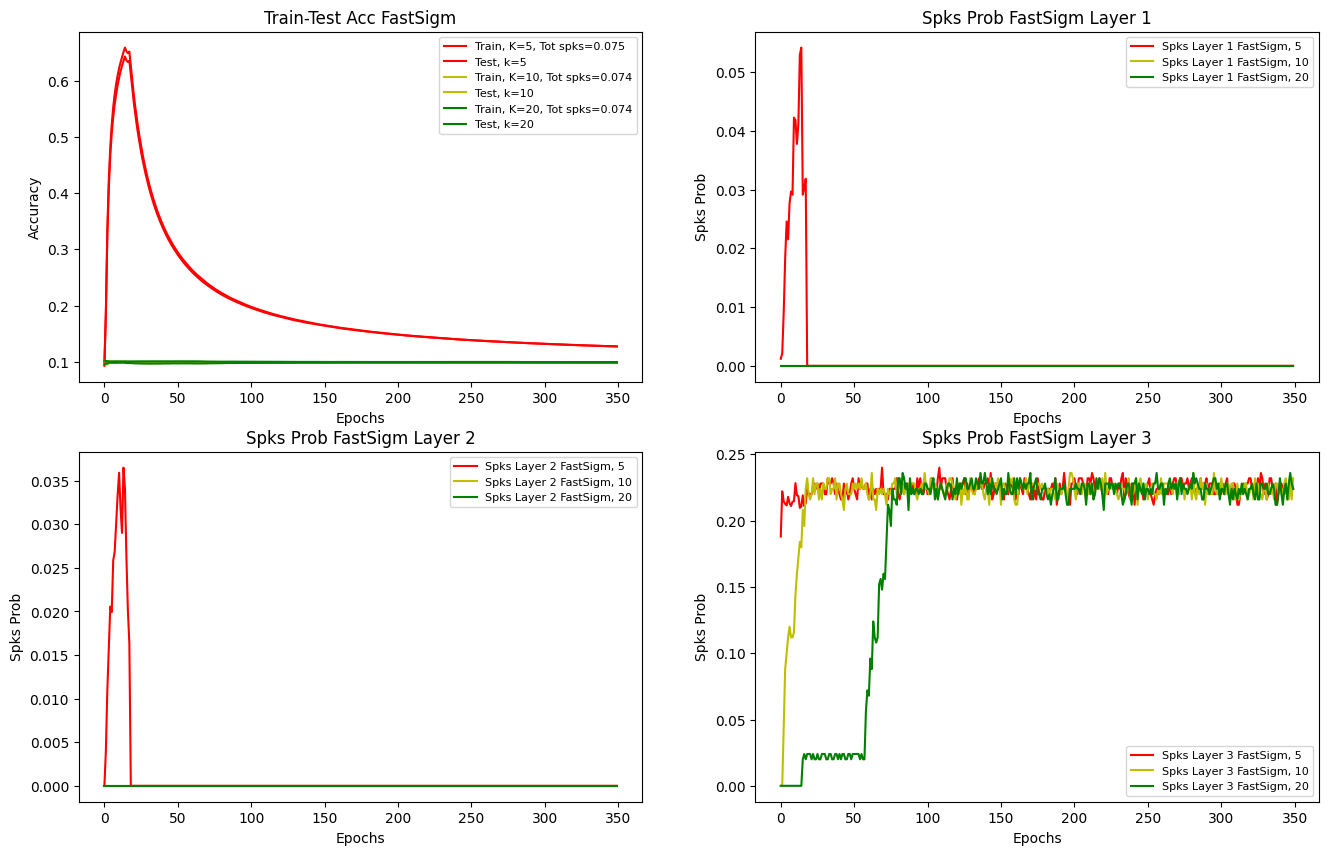

In [12]:
# Plot Atan vs Fast-Sigmoid, for slope coefficient
 
epochs = range(np.shape(spks_layers)[-1])

colors = ['r', 'y', 'g', 'b', 'c', 'm', 'k']
SURR_NAMES = ['Atan', 'FastSigm']
SURR_SLOPES = {'Atan': [5, 12, 25], 'FastSigm': [5, 10, 20]}


def plot_surrogate_function(index_surr: int):
    
    fig, axes = plt.subplots(2,2, figsize=(16,10))
    # loop over the 3 slopes
    for i in range(np.shape(spks_layers)[1]):
        axes[0,0].plot(epochs, accs[index_surr][i][0], f'{colors[i]}', 
                       label=f'Train, K={SURR_SLOPES[SURR_NAMES[index_surr]][i]}, Tot spks={spks_tot_overall[index_surr][i]:.3f}')
        axes[0,0].plot(epochs, accs[index_surr][i][1], f'{colors[i]}', 
                       label=f'Test, k={SURR_SLOPES[SURR_NAMES[index_surr]][i]}')
        axes[0,1].plot(epochs, spks_layers[index_surr][i][0], f'{colors[i]}', 
                       label=f'Spks Layer 1 {SURR_NAMES[index_surr]}, {SURR_SLOPES[SURR_NAMES[index_surr]][i]}')
        axes[1,0].plot(epochs, spks_layers[index_surr][i][1], f'{colors[i]}', 
                       label=f'Spks Layer 2 {SURR_NAMES[index_surr]}, {SURR_SLOPES[SURR_NAMES[index_surr]][i]}')
        axes[1,1].plot(epochs, spks_layers[index_surr][i][2], f'{colors[i]}', 
                       label=f'Spks Layer 3 {SURR_NAMES[index_surr]}, {SURR_SLOPES[SURR_NAMES[index_surr]][i]}')

    axes[0,0].set_title(f'Train-Test Acc {SURR_NAMES[index_surr]}')
    axes[0,1].set_title(f'Spks Prob {SURR_NAMES[index_surr]} Layer 1')
    axes[1,0].set_title(f'Spks Prob {SURR_NAMES[index_surr]} Layer 2')
    axes[1,1].set_title(f'Spks Prob {SURR_NAMES[index_surr]} Layer 3')
    axes[0,0].set_xlabel('Epochs')
    axes[0,1].set_xlabel('Epochs')
    axes[1,0].set_xlabel('Epochs')
    axes[1,1].set_xlabel('Epochs')

    axes[0,0].set_ylabel('Accuracy')
    axes[0,1].set_ylabel('Spks Prob')
    axes[1,0].set_ylabel('Spks Prob')
    axes[1,1].set_ylabel('Spks Prob')

    axes[0,0].legend(fontsize=8)
    axes[0,1].legend(fontsize=8)
    axes[1,0].legend(fontsize=8)
    axes[1,1].legend(fontsize=8)


for index in range(len(SURR_NAMES)):
    plot_surrogate_function(index_surr=index)

plt.show()

In [272]:
# Load data to check accuracy vs sparsity correlation, changing surrogate functions coefficient

def get_tot_spikes_overall(index_surr):
    Spks_tot = []
    for i in range(np.shape(Spks[index_surr])[-1]):
        Spks_tot.append(np.mean(np.sum(Spks[index_surr][i][-75:-1], axis=1)))
    return Spks_tot


Accs_Atan = np.squeeze(np.load('2_Surrogates/Accs_Atan.npy'))
Spks_Layers_Atan = np.load('2_Surrogates/Spks_layers_Atan.npy')

Accs_FastSigm = np.squeeze(np.load('2_Surrogates/Accs_FastSigm.npy'))
Spks_Layers_FastSigm = np.load('2_Surrogates/Spks_layers_FastSigm.npy')


Accs = [Accs_Atan, Accs_FastSigm]
Spks = [Spks_Layers_Atan, Spks_Layers_FastSigm]

Spks_tot = np.array([get_tot_spikes_overall(index_surr=i) for i in range(len(Spks))])

print(f"{np.shape(Accs_Atan)}")
print(f"{np.shape(Spks_Layers_Atan)}")

(3, 2, 400)
(3, 400, 3)


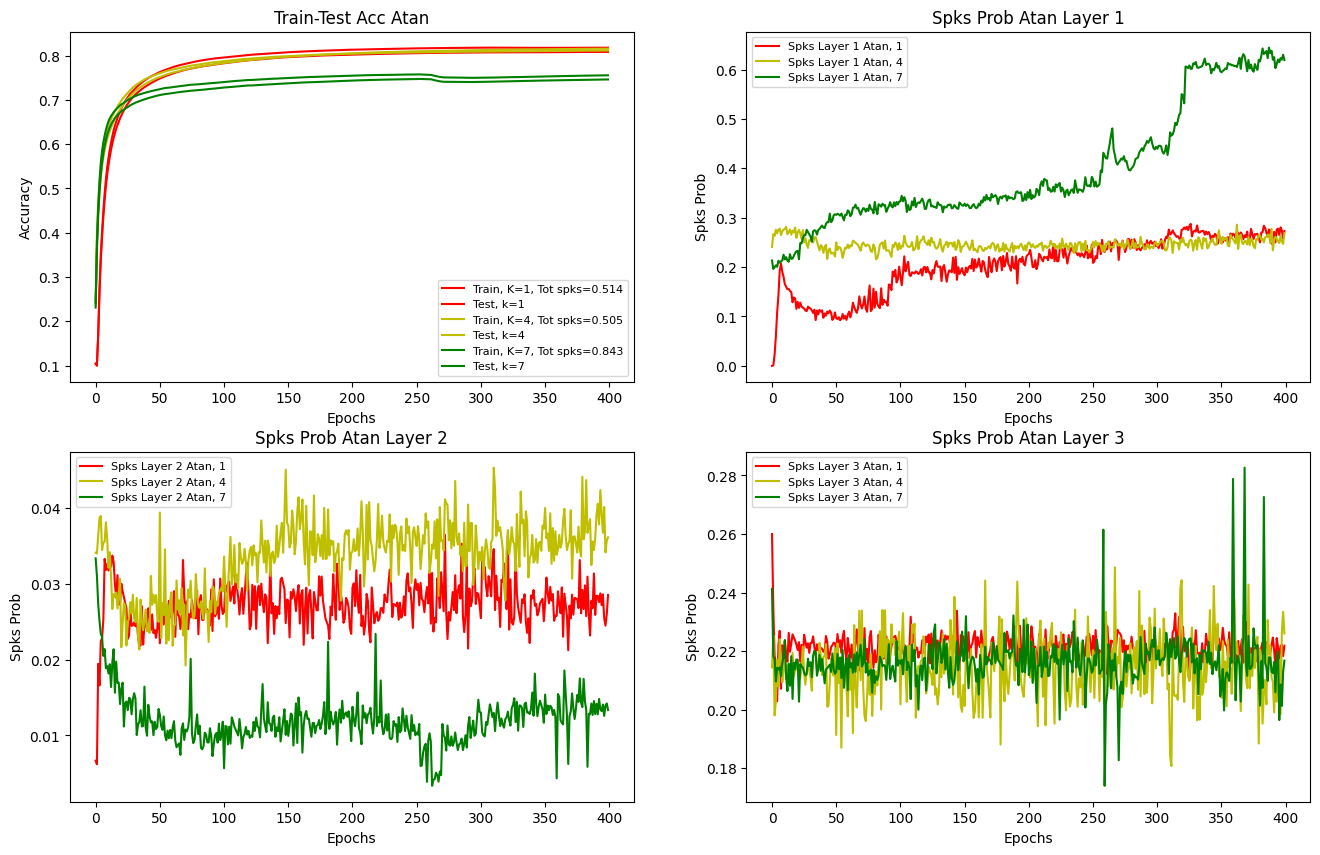

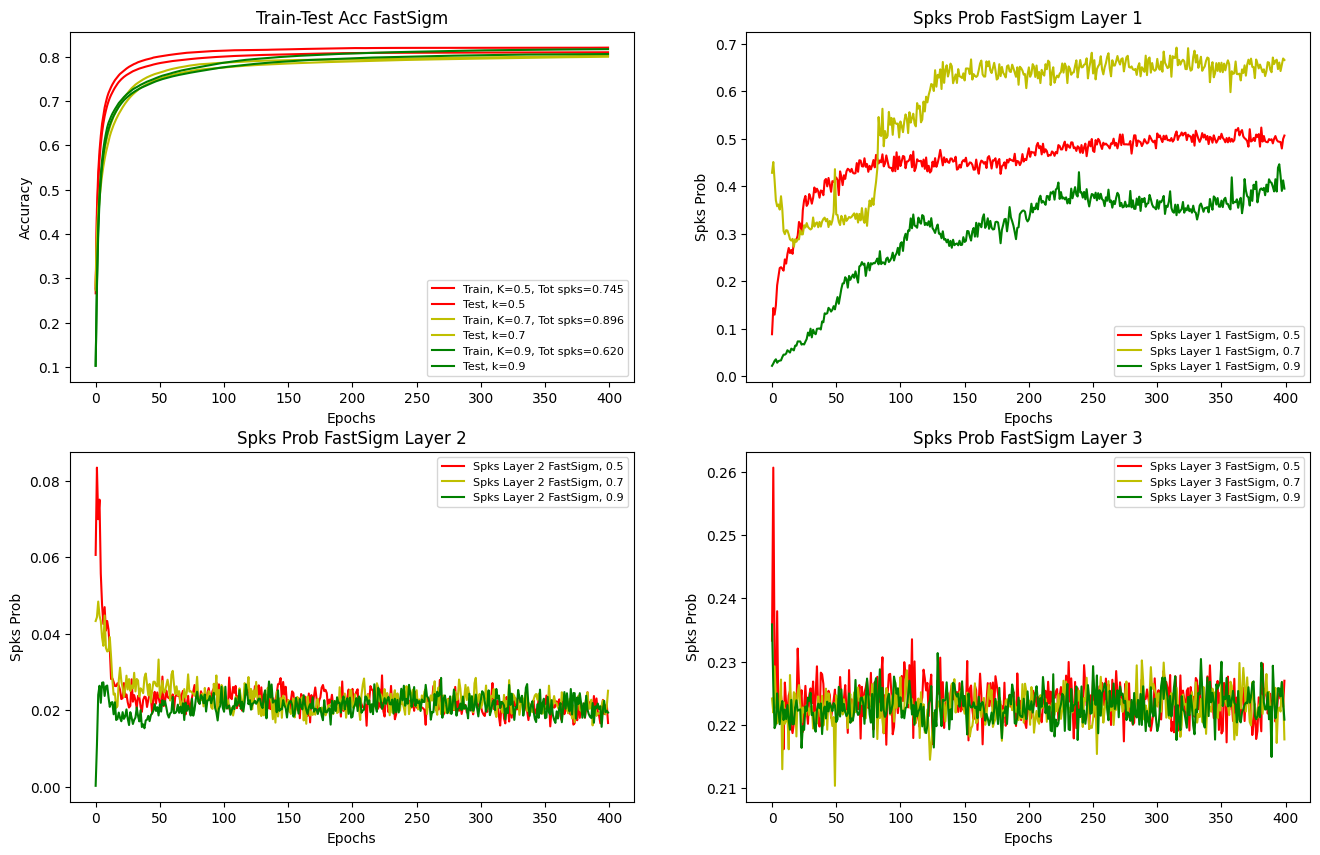

In [273]:
# Plot Atan vs Sigmoid vs Fast-Sigmoid, for slope coefficient
 
epochs = range(np.shape(Spks_Layers_Atan)[1])

colors = ['r', 'y', 'g', 'b', 'c', 'm', 'k']
SURR_NAMES = ['Atan', 'FastSigm']
SURR_SLOPES = {'Atan': [1, 4, 7], 'FastSigm': [0.5, 0.7, 0.9]}


def plot_surrogate_function(index_surr: int):
    
    fig, axes = plt.subplots(2,2, figsize=(16,10))
    # loop over the 3 slopes
    for i in range(np.shape(Spks_Layers_Atan)[0]):
        axes[0,0].plot(epochs, Accs[index_surr][i][0], f'{colors[i]}', 
                       label=f'Train, K={SURR_SLOPES[SURR_NAMES[index_surr]][i]}, Tot spks={Spks_tot[index_surr][i]:.3f}')
        axes[0,0].plot(epochs, Accs[index_surr][i][1], f'{colors[i]}', 
                       label=f'Test, k={SURR_SLOPES[SURR_NAMES[index_surr]][i]}')
        axes[0,1].plot(epochs, Spks[index_surr][i][:,0], f'{colors[i]}', 
                       label=f'Spks Layer 1 {SURR_NAMES[index_surr]}, {SURR_SLOPES[SURR_NAMES[index_surr]][i]}')
        axes[1,0].plot(epochs, Spks[index_surr][i][:,1], f'{colors[i]}', 
                       label=f'Spks Layer 2 {SURR_NAMES[index_surr]}, {SURR_SLOPES[SURR_NAMES[index_surr]][i]}')
        axes[1,1].plot(epochs, Spks[index_surr][i][:,2], f'{colors[i]}', 
                       label=f'Spks Layer 3 {SURR_NAMES[index_surr]}, {SURR_SLOPES[SURR_NAMES[index_surr]][i]}')

    axes[0,0].set_title(f'Train-Test Acc {SURR_NAMES[index_surr]}')
    axes[0,1].set_title(f'Spks Prob {SURR_NAMES[index_surr]} Layer 1')
    axes[1,0].set_title(f'Spks Prob {SURR_NAMES[index_surr]} Layer 2')
    axes[1,1].set_title(f'Spks Prob {SURR_NAMES[index_surr]} Layer 3')
    axes[0,0].set_xlabel('Epochs')
    axes[0,1].set_xlabel('Epochs')
    axes[1,0].set_xlabel('Epochs')
    axes[1,1].set_xlabel('Epochs')

    axes[0,0].set_ylabel('Accuracy')
    axes[0,1].set_ylabel('Spks Prob')
    axes[1,0].set_ylabel('Spks Prob')
    axes[1,1].set_ylabel('Spks Prob')

    axes[0,0].legend(fontsize=8)
    axes[0,1].legend(fontsize=8)
    axes[1,0].legend(fontsize=8)
    axes[1,1].legend(fontsize=8)


for index in range(len(SURR_NAMES)):
    plot_surrogate_function(index_surr=index)

plt.show()